# Time Dependent Schrödinger Equation
In the last video, we saw how to solve the time independent Schrödinger equation for the infinite square well numerically. Now, we're going to see how we can find the time evolution of a quantum system. The time dependent Schrödinger equation is: 

$$ i \hbar \frac{\partial \Psi}{\partial t} = \hat H \Psi(x,t)$$

This can be solved using the separation of variables technique: $\Psi(x,t) = X(x) \tau(t)$. Using this, we see that $\tau(t) = \exp \left( -\frac{i E t}{\hbar} \right)$. So a general state, $\Psi(x,t)$ can be written as a linear combination of the eigenstates of the Hamiltonian: 

$$\Psi(x,t) = \sum_j a_j \psi_j(x) \exp \left( -\frac{i E_j t}{\hbar} \right)$$

Where the coefficients can be found by integrating if we know the initial state of the system: $$a_j = \int \Psi(x,0)^{\star} \psi_j(x) dx.$$

In this example, suppose we have an electron of mass $m$ in an infinite square well of length $L$. At the time $t=0$, the electron is in the state: 

$$\Psi(x,0) = \begin{cases} Ax, & 0 \leq x \leq L/2 \\ A(2-x), & L/2 < x \leq L \end{cases}$$

We can first start by building a Python function returns the original state, ensuring it is properly normalised.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#grid
N = 500
L = 2
x = np.linspace(0,L,N+1)
Delta_x = x[1]-x[0]

#constants 
hbar = 1
m =1


array([0.00489896, 0.00979792, 0.01469688, 0.01959584, 0.0244948 ,
       0.02939376, 0.03429272, 0.03919168, 0.04409064, 0.0489896 ,
       0.05388856, 0.05878752, 0.06368648, 0.06858544, 0.0734844 ,
       0.07838336, 0.08328232, 0.08818128, 0.09308024, 0.0979792 ,
       0.10287816, 0.10777712, 0.11267608, 0.11757504, 0.122474  ,
       0.12737296, 0.13227192, 0.13717088, 0.14206984, 0.1469688 ,
       0.15186776, 0.15676672, 0.16166568, 0.16656464, 0.1714636 ,
       0.17636256, 0.18126152, 0.18616048, 0.19105944, 0.1959584 ,
       0.20085736, 0.20575632, 0.21065528, 0.21555424, 0.2204532 ,
       0.22535215, 0.23025111, 0.23515007, 0.24004903, 0.24494799,
       0.24984695, 0.25474591, 0.25964487, 0.26454383, 0.26944279,
       0.27434175, 0.27924071, 0.28413967, 0.28903863, 0.29393759,
       0.29883655, 0.30373551, 0.30863447, 0.31353343, 0.31843239,
       0.32333135, 0.32823031, 0.33312927, 0.33802823, 0.34292719,
       0.34782615, 0.35272511, 0.35762407, 0.36252303, 0.36742

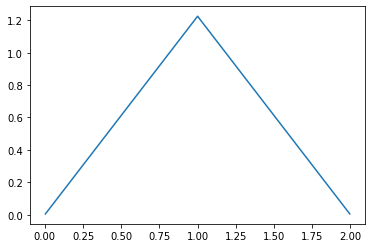

In [7]:
def integral(f, axis=0):
    
    return np.sum(f*Delta_x, axis=axis)

def psi0(x):
    
    f = np.zeros(len(x))
    l = len(x)
    f[:l//2+1] = x[:l//2+1]
    f[l//2+1:] = 2-x[l//2+1:]
    
    A = integral(f**2)
    return f/np.sqrt(A)
    
plt.plot(x[1:-1], psi0(x[1:-1]))

psi0(x[1:-1])

As in the previous video, we can construct the Hamiltonian for this system and find the wavefunctions in Python. It turns out that this is just the kinetic energy which can be represented as a tridiagonal matrix. 

In [5]:
#H

H = -hbar**2/(2*m) *1/(Delta_x)**2 * (np.diag(-2*np.ones(N-1))+ np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1))

#diagonalise
E,psi = np.linalg.eigh(H)


norm = integral(psi.T**2)

psi = psi.T/np.sqrt(norm)

Now, we can find the expansion coefficients for $\Psi(x,t)$ by integrating with $\Psi(x,0)$. 
Once we have the $c_j$, we should make sure that they are normalised. Since $|c_j|^2$ represents the probability of finding the system in state $\psi_j$, we want: 

$$\sum_j |c_j|^2 =1$$

In [6]:
c = []

for n in range(N-1):
    
    c.append(integral(psi0(x[1:-1])*psi[n]))
             
             
c = np.array(c)
np.linalg.norm(c)

1.0

With the $c_j$, we can construct the expansion for $\Psi(x,t)$ and plot this time-dependent wavefunction to see how it varies with time. 

In [7]:
def Psi(t):
    
    return psi.T@(c*np.exp(-1j * E*t))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


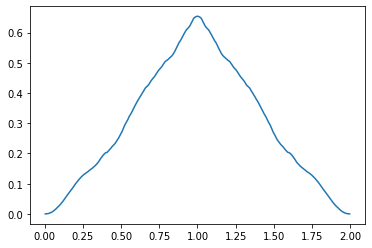

In [8]:
plt.plot(x[1:-1], Psi(20)**2)

This is just an animation to see how the density evolves with time in the well.

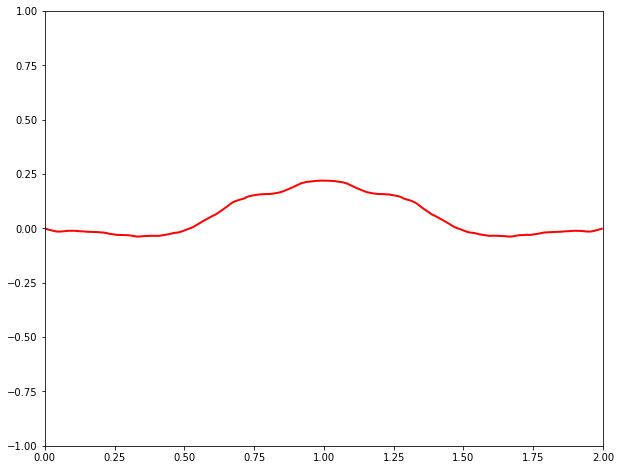

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize = (10,8))
ax = plt.axes(xlim=[0,L],ylim=[-1,1])

line, = ax.plot(x[1:-1],np.zeros(N-1),lw=2,color="red")

def animate(t):
    
    y = np.imag(Psi(t))
    line.set_data(x[1:-1],y)  
    
    return (line,)


def init():
    line.set_data([],[])            
    return (line,)

ani = FuncAnimation(fig, animate, np.linspace(0.,5,250), init_func=init,
                              interval=100, blit=True)
HTML(ani.to_html5_video())